In [1]:
import sys
import aotools
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms
from collections import OrderedDict

sys.path.insert(0, '../')
from model_inception import Net
from load import load
from train import train
from utils import *
from dataset import *
import monitoring

In [2]:
model = Net()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
    model.to(device)
    
# Load weights
model_dir = 'model.pth'
state_dict = torch.load(model_dir)
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove module.
    new_state_dict[name] = v
model.load_state_dict(state_dict)
    
#print(model)    
    
# Test
x = torch.randn(32, 2, 128, 128)
output, _ = model(x)
print(output.shape)
print(_.shape)

torch.Size([32, 128, 128])
torch.Size([32, 20])


In [ ]:
# Data set
data_dir = '../dataset/dataset2/'
dataset_size = 10000
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

#monitor = monitoring.monitoringGPU(120)
    
criterion = nn.MSELoss()
new_params = list(model.parameters())
new_params = new_params[:len(new_params)-6]

#optimizer = optim.SGD([
#                {'params': new_params},
#                {'params': model.module.inception.fc.parameters(), 'lr': 1e-4}
#            ], lr=1e-4)

optimizer = optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)


train(
              model, 
              dataset, 
              optimizer, 
              criterion,
              split = [0.9, 0.1],
              batch_size = 64,
              n_epochs = 150,
              random_seed = 42,
              model_dir = './',
              visdom = True,
)


#monitor.stop()

Visdom successfully connected to server
------------------------------
[1/150] train loss: 1393.869597
[1/150] val loss: 173.734822
[1/150] Time: 46.349786 s
------------------------------
[2/150] train loss: 1378.607531
[2/150] val loss: 201.241215
[2/150] Time: 45.914328 s
------------------------------
[3/150] train loss: 1366.679479
[3/150] val loss: 196.742951
[3/150] Time: 45.467173 s
------------------------------
[4/150] train loss: 1370.315005
[4/150] val loss: 197.496744
[4/150] Time: 45.374338 s
------------------------------
[5/150] train loss: 1359.358416
[5/150] val loss: 190.205680
[5/150] Time: 45.943456 s
------------------------------
[6/150] train loss: 1355.719436
[6/150] val loss: 175.733936
[6/150] Time: 45.706888 s
------------------------------
[7/150] train loss: 1364.051720
[7/150] val loss: 173.868913
[7/150] Time: 46.186607 s
------------------------------
[8/150] train loss: 1368.558208
[8/150] val loss: 186.299773
[8/150] Time: 46.317793 s
----------------

../utils.py:80: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.array(metrics['train_loss' if not zernike else 'zernike_train_loss'])[x]/(0.8*np.log(x)), label='Training loss', color='blue')
../utils.py:80: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, np.array(metrics['train_loss' if not zernike else 'zernike_train_loss'])[x]/(0.8*np.log(x)), label='Training loss', color='blue')


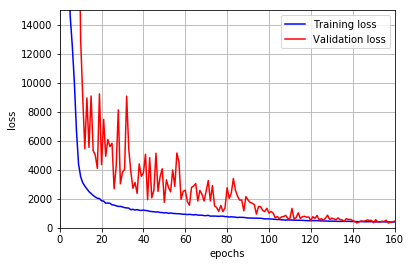

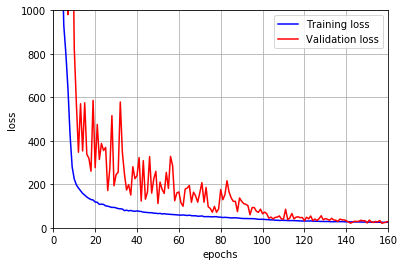

In [5]:
import sys
import aotools
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms
from collections import OrderedDict

sys.path.insert(0, '../')
from model_inception import Net
from load import load
from train import train
from utils import *
from dataset import *
import monitoring

metrics = get_metrics(model_dir='./')
plot_learningcurve(metrics, name='lrcurve.pdf', ylim=[0,15000], xlim=[0,160])
plot_learningcurve(metrics, zernike=True, name='lrcurve_zernike.pdf', ylim=[0,1000], xlim=[0,160])